In [11]:
from modsim import State
bikeshare = State(olin = 10, wellesley = 2, olin_is_empty=0, wellesley_is_empty = 0)

In [12]:
def bike_to_w(state):
    if state.olin == 0:
        state.olin_is_empty += 1
        return
    else:
        state.olin -= 1
        state.wellesley += 1

In [13]:
bike_to_w(bikeshare)

In [14]:
bikeshare_1 = State(olin=10, wellesley = 2)
bikeshare_2 = State(olin=2, wellesley = 10)
bike_to_w(bikeshare_1)
bike_to_w(bikeshare_2)

In [15]:
def bike_to_o(state):
    if state.wellesley == 0:
        state.wellesley_is_empty += 1
        return
    else:
        state.wellesley -= 1
        state.olin += 1

In [16]:
from modsim import TimeSeries
bike_stats = TimeSeries()
empty_stats = TimeSeries()

In [17]:
from modsim import flip
bikeshare_for_stats = State(olin = 100, wellesley = 50, olin_is_empty=0, wellesley_is_empty = 0)
for i in range(10000):
    if flip(0.5):
        bike_to_o(bikeshare_for_stats)
        bike_stats[i] = (bikeshare_for_stats.olin, bikeshare_for_stats.wellesley)
        empty_stats[i] = (bikeshare_for_stats.olin_is_empty, bikeshare_for_stats.wellesley_is_empty)
    else:
        bike_to_w(bikeshare_for_stats)
        bike_stats[i] = (bikeshare_for_stats.olin, bikeshare_for_stats.wellesley)
        empty_stats[i] = (bikeshare_for_stats.olin_is_empty, bikeshare_for_stats.wellesley_is_empty)

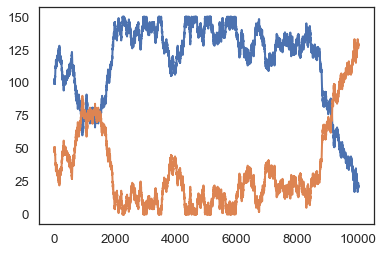

In [18]:
bike_stats.plot()

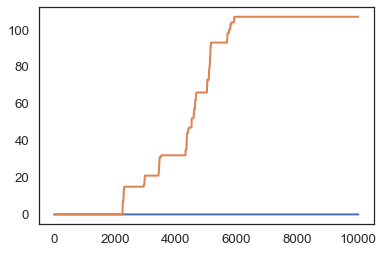

In [19]:
empty_stats.plot()